## Resume Profile Matching:

In [1]:
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [2]:
import glob
import os
import warnings
import textract
import requests
import pixiedust
import PyPDF2
from PyPDF2 import PdfFileWriter, PdfFileReader
import unicodedata
import re
import inflect
from string import punctuation 
#import pandas as pd
#import numpy as np
from collections import Counter

Pixiedust database opened successfully


In [3]:
#nlp
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer,SnowballStemmer

In [4]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [5]:
#sklearn
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [6]:
#libraries version
print ("sklearn :", sklearn.__version__)
print ("nltk :", nltk.__version__)
print ("genisim :",nltk.__version__)

sklearn : 0.22.1
nltk : 3.5
genisim : 3.5


In [7]:
# Plotting tools
#import pyLDAvis
#impor#t pyLDAvis.gensim  # don't skip this
#import pyLDAvis
#import pyLDAvis.gensim  import matplotlib.pyplot as plt
%matplotlib inline

### 1. Load the data

In [8]:
os.chdir(r"D:\PYTHON_IMPORTANT\Profound AI\Assignments\Final_project\Sample resumes")

In [9]:
list_of_files_in_pdf=[]
list_of_files_in_docx=[]

#The glob module finds all the pathnames matching a specified pattern
for file in glob.glob('**/*.pdf', recursive=True):
    list_of_files_in_pdf.append(file)
for file in glob.glob('**/*.docx',recursive=True):
    list_of_files_in_docx.append(file)
    
list_of_files=list_of_files_in_docx + list_of_files_in_pdf


print("This is list of resume for screening\n")
print(list_of_files)
print("\nThe total number of files",len(list_of_files))

This is list of resume for screening

['aditya_Kashyn_ Resume.docx', 'Anoosh_1year...docx', 'Anup Vasanth - BA.docx', 'Balaji_Resume.docx', 'General Content.docx', 'Nikhil Resume.docx', 'Priya_DS_Resume.docx', 'Priya_Resume(1).docx', 'Priya_Resume.docx', 'Raghavendra Paragi.docx', 'Resume madhurima.docx', 'resume_1.docx', 'resume_10.docx', 'resume_100.docx', 'resume_101.docx', 'resume_102.docx', 'resume_103.docx', 'resume_104.docx', 'resume_105.docx', 'resume_106.docx', 'resume_107.docx', 'resume_108.docx', 'resume_109.docx', 'resume_11.docx', 'resume_110.docx', 'resume_111.docx', 'resume_112.docx', 'resume_113.docx', 'resume_114.docx', 'resume_115.docx', 'resume_116.docx', 'resume_117.docx', 'resume_118.docx', 'resume_119.docx', 'resume_12.docx', 'resume_120.docx', 'resume_121.docx', 'resume_122.docx', 'resume_123.docx', 'resume_124.docx', 'resume_125.docx', 'resume_13.docx', 'resume_14.docx', 'resume_15.docx', 'resume_16.docx', 'resume_17.docx', 'resume_18.docx', 'resume_19.docx', 'r

In [10]:
#%%pixie_debugger
resume_order_list=[]
resume_file=[]
resumes=[]
temp_pdf=''

print("**** Parsing the resume *****")
for i, file in enumerate(list_of_files):
    resume_order_list.append(i)
    Temp=file.split(".")
    if Temp[1] == "pdf" or Temp[1] == "Pdf" or Temp[1] == "PDF":
        try:
            
            print("\nThe file uploaded is in pdf formate: ", file)
            
            print("\nExtracting the contents from pdf file using PyPDF2 module")
            with open(file,'rb') as pdf_file:
                read_pdf=PyPDF2.PdfFileReader(pdf_file)
                number_of_pages = read_pdf.getNumPages()
                for page_number in range(number_of_pages):
                    page=read_pdf.getPage(page_number)
                    page_content=page.extractText()
                    page_content=page_content.replace('\n',' ')
                    
                    temp_pdf += str(page_content)
                
                resumes.extend([temp_pdf])
                resume_file.append(file)
                temp_pdf=''
              
        except Exception as e: print(e)
                    
    if Temp[1] == "docx" or Temp[1] == "Docx":
        try:
            
            print("\n ###The file uploaded is in doc formate: ", file)
            
            print("\n ###Extracting the contents from pdf file using textract module")
            
            ##textract package provides a single interface for extracting content from any type of file,                     
            doc = textract.process(file,encoding="utf-8")
            doc = doc.replace(b'\n',b' ')
            doc = doc.replace(b'\r',b' ')
            doc_str = str(doc)
            resumes.extend([doc_str])
            resume_file.append(file)
        except Exception as e: print(e)  

**** Parsing the resume *****

 ###The file uploaded is in doc formate:  aditya_Kashyn_ Resume.docx

 ###Extracting the contents from pdf file using textract module

 ###The file uploaded is in doc formate:  Anup Vasanth - BA.docx

 ###Extracting the contents from pdf file using textract module

 ###The file uploaded is in doc formate:  Balaji_Resume.docx

 ###Extracting the contents from pdf file using textract module

 ###The file uploaded is in doc formate:  General Content.docx

 ###Extracting the contents from pdf file using textract module

 ###The file uploaded is in doc formate:  Nikhil Resume.docx

 ###Extracting the contents from pdf file using textract module

 ###The file uploaded is in doc formate:  Priya_DS_Resume.docx

 ###Extracting the contents from pdf file using textract module

 ###The file uploaded is in doc formate:  Priya_Resume(1).docx

 ###Extracting the contents from pdf file using textract module

 ###The file uploaded is in doc formate:  Priya_Resume.docx

 

 ###The file uploaded is in doc formate:  resume_38.docx

 ###Extracting the contents from pdf file using textract module

 ###The file uploaded is in doc formate:  resume_39.docx

 ###Extracting the contents from pdf file using textract module

 ###The file uploaded is in doc formate:  resume_4.docx

 ###Extracting the contents from pdf file using textract module

 ###The file uploaded is in doc formate:  resume_40.docx

 ###Extracting the contents from pdf file using textract module

 ###The file uploaded is in doc formate:  resume_41.docx

 ###Extracting the contents from pdf file using textract module

 ###The file uploaded is in doc formate:  resume_42.docx

 ###Extracting the contents from pdf file using textract module

 ###The file uploaded is in doc formate:  resume_43.docx

 ###Extracting the contents from pdf file using textract module

 ###The file uploaded is in doc formate:  resume_44.docx

 ###Extracting the contents from pdf file using textract module

 ###The file uplo


 ###The file uploaded is in doc formate:  Vishnu_resume.docx

 ###Extracting the contents from pdf file using textract module

 ###The file uploaded is in doc formate:  ~$nal Resume Priyanka Ambekar.docx

 ###Extracting the contents from pdf file using textract module
File is not a zip file

The file uploaded is in pdf formate:  ABHINAV_RAHATE_CV.PDF

Extracting the contents from pdf file using PyPDF2 module

The file uploaded is in pdf formate:  Akshay Mukundwar.pdf

Extracting the contents from pdf file using PyPDF2 module

The file uploaded is in pdf formate:  CV-Ajitesh_Chauhan-converted.pdf

Extracting the contents from pdf file using PyPDF2 module

The file uploaded is in pdf formate:  Divyansh_Kumar_Singh.pdf

Extracting the contents from pdf file using PyPDF2 module

The file uploaded is in pdf formate:  Frenix_Rajiah_Resume-converted.pdf

Extracting the contents from pdf file using PyPDF2 module

The file uploaded is in pdf formate:  Karan_bari.pdf

Extracting the contents fr

#### Output variables ---> list_of_files, resumes

### 2. Store the data in Table 

In [11]:
##Data Frames 
df1=pd.DataFrame({'name':list_of_files})
df2=pd.DataFrame({'name':resume_file,'content':resumes})
resume_df_org=df1.merge(df2, on='name',how='left')
resume_df_org = resume_df_org.rename(columns = {'index': 'resume_id'}) 

In [12]:
print("Missing Values")
print(resume_df_org.isna().sum())
#remove any missing valuses
resume_df_org=resume_df_org.dropna()
resume_df_org.duplicated().sum()

resume_df_org.reset_index(inplace = True)
resume_df_org = resume_df_org.rename(columns = {'index': 'resume_id'}) 


Missing Values
name       0
content    2
dtype: int64


In [13]:
resume_df = resume_df_org.copy()
resume_df_org.head()

,resume_id,name,content
0,0,aditya_Kashyn_ Resume.docx,b'Aditya Kashyn www.linkedin.com/...
1,2,Anup Vasanth - BA.docx,b'ANUP VASANTH Email: anupvasanth95@gmail.com...
2,3,Balaji_Resume.docx,"b""Email: sm.balaji.1969@gmail.com Mobile: +91-..."
3,4,General Content.docx,"b""Intro : Pick any 1 or 2 paragraph. You can ..."
4,5,Nikhil Resume.docx,"b""Nikhil Sattigeri nikhilshrishail18@gmail.co..."


In [14]:
#Covert the content to list for processing.
resumes=resume_df.content.tolist()

#### Output variables ---> resume_df, resumes  

### 3. Cleaning of resume Text

In [15]:
LATIN_1_CHARS = (
    ('\\xe2\\x80\\x99', "'"),
    ('\\xc3\\xa9','e'),
    ('\\xe2\\x80\\x90', '-'),
    ('\\xe2\\x80\\x91', '-'),
    ('\\xe2\\x80\\x92', '-'),
    ('\\xe2\\x80\\x93', '-'),
    ('\\xe2\\x80\\x94', '-'),
    ('\\xe2\\x80\\x94', '-'),
    ('\\xe2\\x80\\x98', "'"),
    ('\\xe2\\x80\\x9b', "'"),
    ('\\xe2\\x80\\x9c', '"'),
    ('\\xe2\\x80\\x9c', '"'),
    ('\\xe2\\x80\\x9d', '"'),
    ('\\xe2\\x80\\x9e', '"'),
    ('\\xe2\\x80\\x9f', '"'),
    ('\\xe2\\x80\\xa6', '...'),
    ('\\xe2\\x80\\xb2', "'"),
    ('\\xe2\\x80\\xb3', "'"),
    ('\\xe2\\x80\\xb4', "'"),
    ('\\xe2\\x80\\xb5', "'"),
    ('\\xe2\\x80\\xb6', "'"),
    ('\\xe2\\x80\\xb7', "'"),
    ('\\xe2\\x81\\xba', "+"),
    ('\\xe2\\x81\\xbb', "-"),
    ('\\xe2\\x81\\xbc', "="),
    ('\\xe2\\x81\\xbd', "("),
    ('\\xe2\\x81\\xbe', ")"),
    ('\\xc\\xb'," "),
    ('\\xc\\x'," "),
    ('f\\'," ")
)


def clean_latin1(data):
    for _hex, _char in LATIN_1_CHARS:
           if _hex in data:
                data = data.replace(_hex, _char)
    return data


In [16]:
#Cleaning the data:
#removing Urls,emails, newline and extra spaces that is quite distracting using regular expressions.abs

def clean_punctuations(sent):
        
    # Remove Emails
    emails = [re.findall('\S*@\S*\s?',str(sent))]
    resume_clean = re.sub('\S*@\S*\s?', ' ', str(sent))
    
    #Remove Urls
    urls = [re.findall('((www\.[^\s]+)|(https?://[^\s]+))',str(resume_clean))]
    resume_clean = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',resume_clean)
    
    ##covert unicode characters
    resume_clean = clean_latin1(resume_clean)
    
    ##Remove the extra \\t characters
    resume_clean = re.sub(r'(\\t)+','',resume_clean)
    
    ## Remove distracting single quotes
    resume_clean = re.sub("\'|\|", " ", resume_clean)
    
    # Remove new line characters
    resume_clean = re.sub('\s+', ' ', resume_clean)
    resume_clean = re.sub('\n+', '', resume_clean)
    
    #removing punctuations and unnecessary characters
    resume_clean = gensim.utils.simple_preprocess(str(resume_clean), deacc=True)  # deacc=True removes punctuations
    
#    ##Append the sentence to list
#    resumes_clean.append(resume_clean)
        
    return resume_clean

In [17]:
clean_resumes = []
for sent in resumes:
    clean_resumes.append(clean_punctuations(sent))

print(clean_resumes[0])

['aditya', 'kashyn', 'bangalore', 'summary', 'young', 'aspiring', 'data', 'scientist', 'with', 'an', 'analytical', 'bent', 'of', 'mind', 'with', 'an', 'unending', 'thirst', 'to', 'learn', 'ml', 'ai', 'and', 'leverage', 'the', 'same', 'to', 'solve', 'business', 'problems', 'currently', 'working', 'with', 'profondai', 'as', 'freelance', 'data', 'scientist', 'data', 'analyst', 'intern', 'at', 'power', 'research', 'and', 'development', 'consultants', 'pvt', 'ltd', 'hands', 'on', 'experience', 'and', 'in', 'depth', 'knowledge', 'on', 'advanced', 'statistical', 'and', 'machine', 'learning', 'techniques', 'such', 'as', 'chi', 'square', 'test', 'correlation', 'linear', 'regression', 'logistic', 'regression', 'svm', 'decision', 'tree', 'cart', 'random', 'forest', 'means', 'and', 'hierarchical', 'clustering', 'neural', 'networks', 'natural', 'language', 'processing', 'text', 'analytics', 'etc', 'familiar', 'with', 'artificial', 'neural', 'network', 'and', 'deep', 'learning', 'concepts', 'and', '

#### Output variables ---> clean_resumes

### 4. Text Analysis

In [18]:
##Total number of tokens in the list of text:
all_words = [word for doc in clean_resumes for word in doc]
fdist = FreqDist(all_words)
len(fdist)

12644

In [19]:
##Bottom least freq tokens
top_k_words = fdist.most_common()
top_k_words[-10:]

[('ugc', 1),
 ('coun', 1),
 ('cil', 1),
 ('publ', 1),
 ('icati', 1),
 ('blind', 1),
 ('unde', 1),
 ('govern', 1),
 ('ment', 1),
 ('tribunal', 1)]

In [20]:
#DOCUMENT LENGTH:
len_doc=[]
for doc in clean_resumes:
    len_doc.append(len(doc))
print(len_doc)    
print("length of list:",len(len_doc),
      "\naverage document length", np.average(len_doc),
      "\nminimum document length", min(len_doc),
      "\nmaximum document length", max(len_doc))

[487, 331, 623, 373, 370, 649, 697, 1272, 288, 684, 705, 565, 906, 224, 635, 707, 408, 835, 755, 2396, 337, 671, 858, 472, 766, 190, 296, 285, 529, 751, 465, 576, 659, 443, 937, 633, 401, 771, 2144, 292, 611, 2100, 570, 238, 718, 420, 687, 353, 824, 1298, 1452, 239, 555, 2324, 593, 1071, 413, 160, 787, 472, 336, 206, 194, 75, 408, 571, 966, 416, 530, 588, 678, 390, 645, 929, 1285, 438, 327, 334, 490, 633, 552, 1476, 841, 212, 446, 339, 859, 350, 242, 214, 1404, 392, 1165, 790, 237, 2159, 1820, 663, 782, 600, 458, 679, 631, 219, 589, 1132, 1112, 606, 522, 586, 1097, 417, 937, 256, 480, 404, 1370, 691, 1071, 389, 255, 486, 535, 663, 482, 385, 924, 1499, 241, 446, 311, 806, 339, 888, 802, 826, 644, 778, 308, 325, 421, 389, 327, 257, 291, 303, 384, 276, 193, 358, 349, 194, 225, 763, 302, 188, 228, 245, 199, 307, 52, 59, 82, 1159, 350, 36, 55, 279, 350, 308, 368, 281, 707, 281, 425, 302, 240, 345, 416, 306, 460]
length of list: 181 
average document length 590.6187845303867 
minimum documen

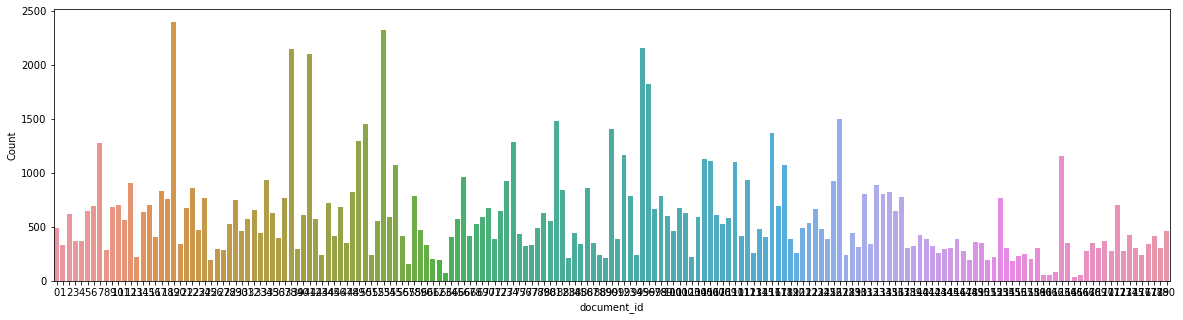

In [21]:
#Resume length
plt.figure(figsize=(20,5))

doc_number = resume_df.index.values
words_df = pd.DataFrame({'document_id':list(doc_number), 'Token length':len_doc})
ax = sns.barplot(data=words_df, x= "document_id", y = "Token length")
ax.set(ylabel = 'Count')
plt.show()

##

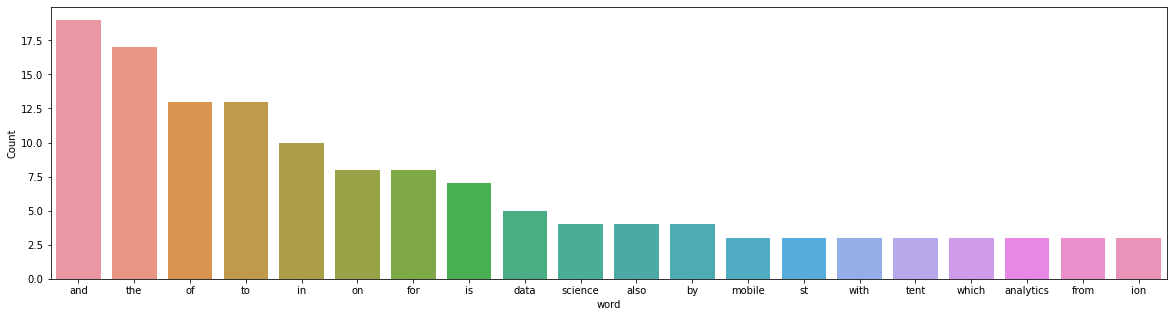

In [22]:
## Frequency of the words
def freq_words(x, top = 30):
    for text in x:
        all_words = ' '.join(text)
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = top) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()


freq_words(clean_resumes,20)

#### Output variables ---> clean_resumes

### 4. Data Normalization

In [23]:
# See trigram example
# Build the bigram and trigram models
def bi_tri_gram_model(tokens, min_count=10, threshold=100 ):
    #Bigrams are two words frequently occurring together in the document. Trigrams are 3 words frequently occurring.
    bigram = gensim.models.Phrases(tokens, min_count=min_count, threshold=threshold) # higher threshold fewer phrases.
    trigram = gensim.models.Phrases(bigram[tokens], threshold=100)  
    
    # Faster way to get a sentence clubbed as a trigram/bigram
    bigram_model = gensim.models.phrases.Phraser(bigram)
    trigram_model = gensim.models.phrases.Phraser(trigram)
    
    return bigram_model, trigram_model
    #print(trigram_mod[bigram_mod[resumes_words[0]]])

In [24]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
nlp = spacy.load('en',disable=['parser', 'ner'])
resumes_textout = []
def data_normalization(sent):
    
    # NLTK Stop words
    stop_words = stopwords.words('english')
    #stop_words.extend(['from', 'subject', 'tq', 'edu', 'using','etc','pvt','ltd','th','email','gmail','id','co','sale','work','also','senior','time',
    #                   'used','year','learn','team','work','model','tool','sale','se','concept','hence','airbnb','build','affect','thereby','ns','tata',
    #                   'moster','ratio','genuine','poster','traffic','meaning','issn','avail','transfer','prove','agreement','summary',
    #                   'young','learning','end','mind','solve','develop','knowledge','client','size','problem','various',
    #                  'base','technique','complaint','omplaint','complain','con','network','detail','question','use','find','research','enthusia','side',
    #                   'complete','graduation','hon','new','professional','expand','idea','college','executive','course','acadamic','provide','high',
    #                   'good','part','utilize','deliver','contribution','collection','special','particular','different','establish','lecture','udemy',
    #                   'keep','utilize','create','fix','sign','help','basic','private','accordingly','indian','wise','aegis_school','aim','fantasy',
    #                   'manner','furish','difference','ready','acknowledge','gives','springer',''])
    #
    #lookup_dict = {'machine': 'machine_learning','science':'data_science','scientist':'data_scientist','ml':'machine_learning',
    #               'ai':'artficial_intelligence','analyst':'data_analyst','deep':'deep_learning'}
    
    # Remove Stop Words
    resumes_words_stop = [word for word in sent if word not in stop_words]
    
    #Bigrams
    #resumes_words_bi = [bigram_mod[resumes_words_stop]]
    
    #Trigram
    #resumes_words = trigram_mod[bigram_mod[resumes_words_stop]]
    
    #Lookup words
    #resumes_words = [word.replace(word, lookup_dict[word]) if word in lookup_dict else word for word in resumes_words]
    
    #nlp = spacy.load('en',disable=['parser', 'ner'])
    ##Lemmatization
    doc = nlp(" ".join(resumes_words_stop))
    resume_lemma = (" ".join([token.lemma_ for token in doc if token.pos_ in ['NOUN', 'ADJ', 'VERB', 'ADV']]))
    
    # Remove Stop Words
    #resumes_words_lemma = [word for word in simple_preprocess(str(resume_lemma)) if word not in stop_words]
    
    x = resume_lemma.split()
    y = [s for s in x if len(s) > 2]
    
    return y

In [25]:
#bigram_mod, trigram_mod = bi_tri_gram_model(clean_resumes)
normalize_resumes = []
for resume in clean_resumes:
    resume_norm = data_normalization(resume)
    normalize_resumes.append(resume_norm)
    
#normalize_resumes = list(normalize_resumes)


In [26]:
print(normalize_resumes[180])

['chat', 'summary', 'researcher', 'datum', 'science', 'enthusia', 'complete', 'graduation', 'hon', 'physics', 'also', 'add', 'research', 'paper', 'prediction', 'springer', 'duct', 'ducational', 'datum', 'science', 'busine', 'analytic', 'big', 'datum', 'bachelor', 'indian', 'certificate', 'project', 'signature', 'develop', 'signature', 'recognition', 'verification', 'stem', 'use', 'deep', 'learning', 'use', 'skill', 'siamese', 'nition', 'fold', 'architecture', 'xtraction', 'image', 'document', 'also', 'implementation', 'follow', 'project', 'industrial', 'ject', 'supervisor', 'effectively', 'development', 'dynamic', 'visualization', 'platform', 'increase', 'employee', 'supervisor', 'ratio', 'client', 'choose', 'perfect', 'number', 'employee', 'report', 'prediction', 'problem', 'predict', 'song', 'large', 'influencer', 'son', 'work', 'part', 'datum', 'set', 'aken', 'official', 'mobile', 'app', 'analytic', 'great', 'way', 'understand', 'exist', 'strategy', 'drive', 'owth', 'retent', 'futur

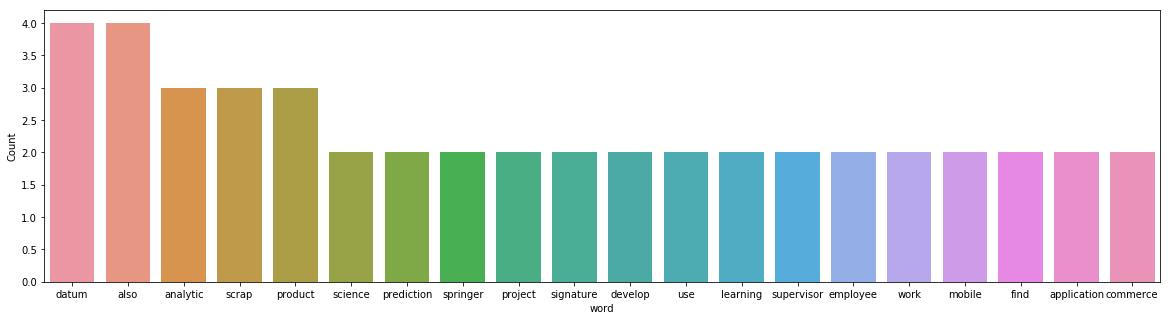

In [27]:
## Frequency of the words
def freq_words(x, top = 30):
    for text in x:
        all_words = ' '.join(text)
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = top) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()


freq_words(normalize_resumes,20)


In [28]:
resume_df['normalize_text']=normalize_resumes
resume_df.head()

,resume_id,name,content,normalize_text
0,0,aditya_Kashyn_ Resume.docx,b'Aditya Kashyn www.linkedin.com/...,"[summary, young, aspire, datum, scientist, min..."
1,2,Anup Vasanth - BA.docx,b'ANUP VASANTH Email: anupvasanth95@gmail.com...,"[self, motivated, professional, year, experien..."
2,3,Balaji_Resume.docx,"b""Email: sm.balaji.1969@gmail.com Mobile: +91-...","[email, balaji, objective, young, datum, analy..."
3,4,General Content.docx,"b""Intro : Pick any 1 or 2 paragraph. You can ...","[pick, paragraph, create, sentence, summary, c..."
4,5,Nikhil Resume.docx,"b""Nikhil Sattigeri nikhilshrishail18@gmail.co...","[objective, succeed, environment, growth, exce..."


#### Output variables ---> normalize_resumes, resume_df

### Split the corpus into training and testing

length of list: 181

In [46]:
np.random.seed(3)
msk = np.random.rand(len(resume_df)) < 0.80

In [47]:
# Use 160 articles for training.
train_resumes_df =  resume_df[msk]
train_resumes_df.reset_index(drop=True,inplace=True)
test_resumes_df = resume_df[~msk]
test_resumes_df.reset_index(drop=True,inplace=True)

In [48]:
train_resumes = train_resumes_df['normalize_text'].tolist()
test_resumes = test_resumes_df['normalize_text'].tolist()

In [49]:
len(train_resumes_df),len(test_resumes_df)

(147, 34)

##### Output variables ---> train_resumes, train_resumes_df, test_resumes, test_resumes_df

### 5. Data vectorization 

##### Building word dictionary: 

build the vocabulary of the corpus in which all the unique words of the article corpus are given IDs and their frequency counts are also stored. 

In [50]:
from gensim import corpora

# Creating term dictionary of corpus, where each unique term is assigned an index.
dictionary = corpora.Dictionary(train_resumes)

In [51]:
# Filter terms which occurs in less than 4 articles & more than 40% of the articles
dictionary.filter_extremes(no_below=4, no_above=0.4)

In [52]:
# List of few words which are removed from dictionary as they are content neutral
stoplist = set('want fair continue fair also choose bca know kpi likely  cgpa from subject edu using etc pvt ltd email gmail sale work also senior time used year team work se concept hence affect thereby ns tata \
                moster ratio genuine poster issn avail prove agreement summary young end mind solve develop knowledge client size problem various \
                base technique complaint omplaint complain con network detail question use find research enthusia side complete graduation hon new \
                expand idea college executive course acadamic provide high good part utilize special particular different establish lecture udemy \
                keep utilize create fix sign help basic private accordingly indian wise aegis_school aim fantasy manner furish difference ready \
                acknowledge gives'.split() )

In [53]:
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)

In [54]:
#Each word is also given a unique id in the vocabulary 
print(dictionary.token2id)

{'ability': 0, 'able': 1, 'activity': 2, 'address': 3, 'advance': 4, 'algorithm': 5, 'analyst': 6, 'analytic': 7, 'analytical': 8, 'approach': 9, 'article': 10, 'artificial': 11, 'aspire': 12, 'attribute': 13, 'blog': 14, 'build': 15, 'building': 16, 'category': 17, 'classification': 18, 'cluster': 19, 'communicator': 20, 'company': 21, 'cook': 22, 'correlation': 23, 'current': 24, 'currently': 25, 'curricular': 26, 'cycle': 27, 'decision': 28, 'deep': 29, 'depth': 30, 'detect': 31, 'detection': 32, 'development': 33, 'discover': 34, 'documentation': 35, 'drive': 36, 'effective': 37, 'element': 38, 'emotion': 39, 'engineering': 40, 'ensemble': 41, 'environment': 42, 'equipment': 43, 'evaluation': 44, 'excellent': 45, 'extraction': 46, 'familiar': 47, 'feature': 48, 'forest': 49, 'formulate': 50, 'framework': 51, 'give': 52, 'hierarchical': 53, 'identify': 54, 'implement': 55, 'implementation': 56, 'improve': 57, 'independently': 58, 'insight': 59, 'interest': 60, 'interpersonal': 61, '

In [55]:
print("The dictionary has: " +str(len(dictionary)) + " tokens")

The dictionary has: 1550 tokens


#### Bag of word / Corpus
        First we build the vocabulary for resumes and then we generate a word count vector for each article, which is nothing but the frequencies of all the words in the vocabulary for that particular article.

In [56]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in train_resumes]

In [57]:
word_frequencies = [[(dictionary[id], frequence) for id, frequence in couple] for couple in doc_term_matrix]

In [58]:
print(word_frequencies)

[[('ability', 1), ('able', 1), ('activity', 1), ('address', 2), ('advance', 2), ('algorithm', 1), ('analyst', 2), ('analytic', 2), ('analytical', 2), ('approach', 1), ('article', 1), ('artificial', 2), ('aspire', 1), ('attribute', 1), ('blog', 1), ('build', 5), ('building', 2), ('category', 1), ('classification', 3), ('cluster', 3), ('communicator', 1), ('company', 1), ('cook', 1), ('correlation', 1), ('current', 1), ('currently', 1), ('curricular', 1), ('cycle', 1), ('decision', 3), ('deep', 3), ('depth', 1), ('detect', 1), ('detection', 1), ('development', 2), ('discover', 1), ('documentation', 2), ('drive', 1), ('effective', 1), ('element', 1), ('emotion', 1), ('engineering', 1), ('ensemble', 1), ('environment', 1), ('equipment', 1), ('evaluation', 1), ('excellent', 1), ('extraction', 2), ('familiar', 1), ('feature', 1), ('forest', 1), ('formulate', 1), ('framework', 1), ('give', 1), ('hierarchical', 1), ('identify', 1), ('implement', 1), ('implementation', 1), ('improve', 1), ('ind

#### Output variables ---> dictionary, doc_term_matrix

Load the LDA model file before running to retain the topics.

### 6. Latent Dirichlet Allocation

is an unsupervised probabilistic model which is used to discover latent themes in a document. 

In [59]:
from gensim.models.ldamodel import LdaModel as Lda

# Build LDA model
lda_model = Lda(corpus=doc_term_matrix,id2word=dictionary,num_topics=26,alpha=1e-2, eta=0.5e-2, chunksize=300, minimum_probability=0.0,passes=50,iterations=500)
print(lda_model) 

LdaModel(num_terms=1550, num_topics=26, decay=0.5, chunksize=300)


In [60]:
import _pickle as cPickle

# dump LDA model using cPickle for future use
ldafile = open('lda_model_sym_wiki.pkl','wb')
cPickle.dump(lda_model,ldafile)
ldafile.close()


In [61]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=train_resumes, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3898897158324376


In [62]:
lda_model.show_topics(num_topics=10, num_words=20)

[(16,
  '0.010*"technology" + 0.010*"company" + 0.010*"product" + 0.008*"large" + 0.008*"student" + 0.007*"material" + 0.007*"level" + 0.007*"ensure" + 0.007*"statistical" + 0.006*"development" + 0.006*"manage" + 0.006*"manager" + 0.006*"set" + 0.006*"equipment" + 0.006*"highly" + 0.005*"strong" + 0.005*"study" + 0.005*"necessary" + 0.005*"position" + 0.005*"regulatory"'),
 (8,
  '0.016*"natural" + 0.016*"cost" + 0.016*"test" + 0.013*"perform" + 0.013*"corporate" + 0.011*"product" + 0.011*"action" + 0.011*"assessment" + 0.010*"organization" + 0.009*"oil" + 0.009*"utility" + 0.009*"acquisition" + 0.009*"gas" + 0.008*"communication" + 0.008*"seminar" + 0.008*"interest" + 0.008*"assurance" + 0.008*"professional" + 0.007*"expert" + 0.007*"manager"'),
 (14,
  '0.024*"application" + 0.016*"software" + 0.012*"product" + 0.011*"lead" + 0.011*"user" + 0.011*"solution" + 0.010*"test" + 0.010*"developer" + 0.010*"development" + 0.009*"web" + 0.009*"cell" + 0.009*"code" + 0.009*"computer" + 0.009*

In [45]:
lda_model.show_topic(topicid=0, topn=20)

[('distribute', 0.017110446),
 ('development', 0.015895864),
 ('permit', 0.014409561),
 ('manage', 0.011983638),
 ('perform', 0.011186529),
 ('sample', 0.009908055),
 ('power', 0.009812828),
 ('quality', 0.009675833),
 ('cost', 0.009594851),
 ('energy', 0.009007726),
 ('lead', 0.008557896),
 ('image', 0.007972191),
 ('service', 0.0075000725),
 ('machine', 0.006988658),
 ('performance', 0.0063824193),
 ('state', 0.0063060545),
 ('material', 0.0061443853),
 ('market', 0.006122703),
 ('review', 0.0058784112),
 ('manager', 0.0058765034)]

In [63]:
import pyLDAvis
import pyLDAvis.gensim  
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.
 [_prepare.py:257]


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.071604  0.001751       1        1  13.448769
16    -0.001101  0.045096       2        1   6.279804
1     -0.228296 -0.083434       3        1   5.991061
18     0.064748 -0.127098       4        1   5.837132
14    -0.101661  0.047417       5        1   5.605617
19    -0.240025 -0.038532       6        1   5.421407
21    -0.117268  0.035215       7        1   5.164908
12    -0.239670 -0.070426       8        1   4.801495
9      0.029689  0.124163       9        1   4.328599
13     0.141289  0.009292      10        1   4.290089
23     0.128564 -0.155064      11        1   3.489130
7      0.029599 -0.064003      12        1   3.485798
11     0.092585  0.078947      13        1   3.238871
8     -0.028516  0.120363      14        1   2.951210
10    -0.121709  0.040503      15        1   2.852784
15     0.011674 -0.110065      16        1   2.814396
6      0.125491 -0.097935      17        1   2.777201
2      0.129168 -0.057683      18        1   2.765273
22     0.085709  0.157610      19        1   2.705586
3      0.097583  0.001727      20        1   2.636814
24     0.162794 -0.026017      21        1   2.495914
20    -0.052131  0.068264      22        1   2.148616
5      0.030548  0.032373      23        1   1.705878
0     -0.090551 -0.100037      24        1   1.199375
17     0.031202 -0.075151      25        1   0.883620
25    -0.011321  0.242728      26        1   0.680654, topic_info=     Category        Freq            Term       Total  loglift  logprob
646   Default  203.000000         student  203.000000  30.0000  30.0000
373   Default  108.000000          sample  108.000000  29.0000  29.0000
748   Default  101.000000           water  101.000000  28.0000  28.0000
93    Default  173.000000         product  173.000000  27.0000  27.0000
65    Default  149.000000           learn  149.000000  26.0000  26.0000
318   Default  165.000000            test  165.000000  25.0000  25.0000
702   Default  142.000000      laboratory  142.000000  24.0000  24.0000
627   Default   87.000000             lab   87.000000  23.0000  23.0000
733   Default   58.000000          safety   58.000000  22.0000  22.0000
72    Default  100.000000         machine  100.000000  21.0000  21.0000
458   Default  139.000000          manage  139.000000  20.0000  20.0000
78    Default  135.000000           model  135.000000  19.0000  19.0000
688   Default  117.000000   environmental  117.000000  18.0000  18.0000
761   Default   80.000000            cell   80.000000  17.0000  17.0000
375   Default  174.000000        software  174.000000  16.0000  16.0000
408   Default   70.000000           image   70.000000  15.0000  15.0000
898   Default   44.000000            care   44.000000  14.0000  14.0000
112   Default  115.000000            tool  115.000000  13.0000  13.0000
530   Default   67.000000        database   67.000000  12.0000  12.0000
365   Default   92.000000      production   92.000000  11.0000  11.0000
262   Default  122.000000           study  122.000000  10.0000  10.0000
647   Default   90.000000           teach   90.000000   9.0000   9.0000
33    Default  168.000000     development  168.000000   8.0000   8.0000
40    Default  100.000000     engineering  100.000000   7.0000   7.0000
241   Default  154.000000         perform  154.000000   6.0000   6.0000
322   Default   46.000000          vector   46.000000   5.0000   5.0000
597   Default   53.000000         biology   53.000000   4.0000   4.0000
1026  Default   54.000000           grade   54.000000   3.0000   3.0000
604   Default  111.000000         conduct  111.000000   2.0000   2.0000
252   Default   77.000000          school   77.000000   1.0000   1.0000
...       ...         ...             ...         ...      ...      ...
632   Topic26    0.966762         nursing    6.012399   3.1622  -5.3504
842   Topic26    0.966762           radio    6.017630   3.1614  -5.35

In [48]:
def compute_coherence_values(dictionary, corpus, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=dictionary,
                                            num_topics=num_topics, 
                                            random_state=100,
                                            alpha='auto',
                                            decay=0.5,
                                            update_every=1,
                                            chunksize=1000,
                                            passes=50,
                                            offset=64,
                                            eta=None,
                                            eval_every=0,
                                            iterations=500,
                                            per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=train_resumes, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values    

In [49]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, start=2, limit=100, step=6)

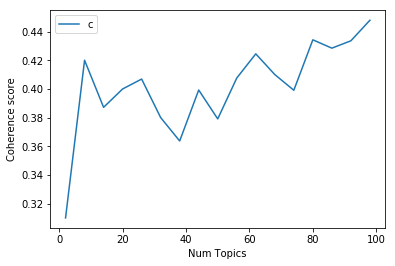

In [50]:
# Show graph
limit=100; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [51]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.31
Num Topics = 8  has Coherence Value of 0.42
Num Topics = 14  has Coherence Value of 0.3872
Num Topics = 20  has Coherence Value of 0.4
Num Topics = 26  has Coherence Value of 0.4069
Num Topics = 32  has Coherence Value of 0.38
Num Topics = 38  has Coherence Value of 0.3637
Num Topics = 44  has Coherence Value of 0.3992
Num Topics = 50  has Coherence Value of 0.3791
Num Topics = 56  has Coherence Value of 0.4076
Num Topics = 62  has Coherence Value of 0.4245
Num Topics = 68  has Coherence Value of 0.41
Num Topics = 74  has Coherence Value of 0.3991
Num Topics = 80  has Coherence Value of 0.4343
Num Topics = 86  has Coherence Value of 0.4285
Num Topics = 92  has Coherence Value of 0.4336
Num Topics = 98  has Coherence Value of 0.4479


#### Topic Table:

In [64]:
for index, topic in lda_model.show_topics(formatted=False, num_words= 10):
        print('Topic: {} --> Words: {}'.format(index, [w[0] for w in topic]))

Topic: 2 --> Words: ['water', 'biology', 'analyze', 'manage', 'environmental', 'multiple', 'protocol', 'public', 'student', 'lab']
Topic: 17 --> Words: ['imagery', 'database', 'wide', 'analyst', 'write', 'aerial', 'traffic', 'town', 'satellite', 'goal']
Topic: 11 --> Words: ['prepare', 'permit', 'manage', 'financial', 'distribute', 'company', 'development', 'need', 'power', 'energy']
Topic: 4 --> Words: ['perform', 'laboratory', 'environmental', 'equipment', 'product', 'test', 'support', 'production', 'training', 'material']
Topic: 18 --> Words: ['vector', 'study', 'clinical', 'model', 'researcher', 'community', 'biology', 'positive', 'host', 'result']
Topic: 7 --> Words: ['study', 'file', 'print', 'duty', 'graphic', 'color', 'scientific', 'review', 'document', 'large']
Topic: 20 --> Words: ['product', 'software', 'development', 'technology', 'clinical', 'compression', 'marketing', 'strategic', 'manage', 'model']
Topic: 25 --> Words: ['care', 'safety', 'test', 'dataset', 'critical', 'r

In [65]:
dominant_keywords =[]
dominant_keyword_contribution = []
dominant_topic_num =[]
document_id =[]
for i, row in enumerate(lda_model[doc_term_matrix]):
    row = sorted(row, key= lambda x: (x[1]), reverse=True)
    for j, (topic_num, topic_prop) in enumerate(row): 
        if j==0:
            wp = lda_model.show_topic(topic_num)
            keyword = " ".join(word for word, prop in wp)
            dominant_keywords.append(keyword)
            dominant_keyword_contribution.append(topic_prop)
            dominant_topic_num.append(topic_num)
    document_id.append(i)

In [66]:
print(dominant_keywords[143])
print(dominant_keyword_contribution[143])
print(dominant_topic_num[143])
print(document_id[143])

test tool learn application machine language software predict user model
0.5755562
1
143


In [67]:
train_resumes_df['dominant_topic_num'] = dominant_topic_num
train_resumes_df['dominant_topic_contribution'] = dominant_keyword_contribution
train_resumes_df['dominant_keywords'] =  dominant_keywords

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy [ipykernel_launcher.py:1]
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy [ipykernel_launcher.py:2]
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy [ipykernel_launcher.py:3]


In [68]:
train_resumes_df.loc[143][4:]

dominant_topic_num                                                             1
dominant_topic_contribution                                             0.575556
dominant_keywords              test tool learn application machine language s...
Name: 143, dtype: object

In [70]:
train_resumes_df.head(10)

,resume_id,name,content,normalize_text,dominant_topic_num,dominant_topic_contribution,dominant_keywords
0,0,aditya_Kashyn_ Resume.docx,b'Aditya Kashyn www.linkedin.com/...,"[summary, young, aspire, datum, scientist, min...",12,0.532276,model software support application tool regres...
1,2,Anup Vasanth - BA.docx,b'ANUP VASANTH Email: anupvasanth95@gmail.com...,"[self, motivated, professional, year, experien...",19,0.273949,learn model machine learning document statisti...
2,3,Balaji_Resume.docx,"b""Email: sm.balaji.1969@gmail.com Mobile: +91-...","[email, balaji, objective, young, datum, analy...",19,0.998993,learn model machine learning document statisti...
3,4,General Content.docx,"b""Intro : Pick any 1 or 2 paragraph. You can ...","[pick, paragraph, create, sentence, summary, c...",12,0.998420,model software support application tool regres...
4,7,Priya_Resume(1).docx,b'PRIYA S Mobile: +91-9880557563 E-mail: p...,"[mail, career, objective, work, learn, challen...",19,0.909754,learn model machine learning document statisti...
5,8,Priya_Resume.docx,"b""PRIYA S Mobile: +91-9880557563 E-mail: p...","[mail, career, objective, work, learn, challen...",19,0.871401,learn model machine learning document statisti...
6,9,Raghavendra Paragi.docx,"b'Raghavendra Paragi Bangalore/Karnataka, Ind...","[contact, profile, total, experience, year, re...",21,0.325054,software lead solution machine company enginee...
7,10,Resume madhurima.docx,b'Madhurima Sengupta E-Mail: sgmadhurima@gmai...,"[sengupta, mail, mobile, pursue, professionall...",19,0.581698,learn model machine learning document statisti...
8,11,resume_1.docx,b'resume_1@gmail.com 982.338.6411 Customer Se...,"[customer, email, indeed, indeed, com, aecf, w...",15,0.773481,image detection automatic feature method condu...
9,12,resume_10.docx,b'resume_10@gmail.com 987 690 0564 Barbara Hen...,"[email, indeed, indeed, look, administrative, ...",20,0.998487,product software development technology clinic...


### Grouping the document based on topics
Related document extraction based on the topic 

In [71]:
###Grouping the document based on topics
train_resumes_df_grouped_df = pd.DataFrame()
train_resumes_df_grouped_df = train_resumes_df.sort_values(['dominant_topic_contribution'],ascending=False).groupby('dominant_topic_num').head(1)

In [73]:
train_resumes_df_grouped_df = train_resumes_df_grouped_df.sort_values(['dominant_topic_num'],ascending=True)
train_resumes_df_grouped_df

,resume_id,name,content,normalize_text,dominant_topic_num,dominant_topic_contribution,dominant_keywords
129,155,sample13.pdf,grad.illinois.edu/CareerDevelopment JUA...,"[doctor, philosophy, expect, fall, bachelor, s...",0,0.998833,student learn deep dataset material visualizat...
64,73,resume_42.docx,b'resume_42@gmail.com 821 617 5199 Geovanny Ro...,"[automation, email, indeed, indeed, com, geova...",1,0.999176,test tool learn application machine language s...
29,36,resume_121.docx,"b""resume_121@gmail.com 887-158-1173 Brattlebo...","[email, indeed, indeed, com, bcc, skilled, pre...",2,0.998875,water biology analyze manage environmental mul...
40,48,resume_2.docx,b'resume_2@gmail.com (848)-528-6514 Engineer ...,"[division, email, indeed, indeed, experience, ...",3,0.998347,survey construction training train environment...
10,13,resume_100.docx,b'resume_100@gmail.com 149.728.4596 Shadi Bakh...,"[email, indeed, indeed, com, seek, full, time,...",4,0.999392,perform laboratory environmental equipment pro...
81,94,resume_61.docx,"b""resume_61@gmail.com (953).210.9882 Kenneth S...","[email, indeed, indeed, com, look, gain, clini...",5,0.998800,student run event award relate engineering lea...
16,19,resume_106.docx,b'resume_106@gmail.com (750)-613-9857 Susan Ke...,"[email, indeed, indeed, com, authorize, work, ...",6,0.998739,protein safety cell production expression cult...
96,113,resume_79.docx,"b""resume_79@gmail.com 355 882 0683 Michael Cic...","[email, indeed, indeed, com, season, senior, g...",7,0.999204,study file print duty graphic color scientific...
105,123,resume_88.docx,b'resume_88@gmail.com 755-834-8852 Nisha Chaub...,"[teach, assistant, colchester, email, indeed, ...",8,0.998430,natural cost test perform corporate product ac...
83,97,resume_64.docx,"b""resume_64@gmail.com (241) 057 7830 Leonid Al...","[iemba, former, online, professor, email, inde...",9,0.999594,student read school development write speciali...


#### percentage of document for each topic:

In [74]:
##Number of document for each topic 
topic_num_doc = train_resumes_df['dominant_topic_num'].value_counts()
topic_num_doc = topic_num_doc.sort_index(ascending=True)
#print(topic_num_doc)

## Percentage of Documents for Each Topic
topic_per_doc = round((topic_num_doc/topic_num_doc.sum())*100,4)
#print(topic_per_doc)

# Topic Number and Keywords
topic_num_keywords2 = pd.concat([topic_num_doc, topic_per_doc],axis=1)
topic_num_keywords2 = topic_num_keywords2.reset_index()
topic_num_keywords2 = topic_num_keywords2.rename(columns = {'index':'dominant_topic_num','dominant_topic_num' : 'topic_num_grp_doc' , 'dominant_topic_num': 'topic_num_grp_doc_per' })
#topic_num_keywords2

# Concatenate Column wise
train_resumes_df_grouped = pd.merge(train_resumes_df_grouped_df, topic_num_keywords2, on='dominant_topic_num')
train_resumes_df_grouped.head()

,resume_id,name,content,normalize_text,dominant_topic_num,dominant_topic_contribution,dominant_keywords,topic_num_grp_doc_per,topic_num_grp_doc_per
0,155,sample13.pdf,grad.illinois.edu/CareerDevelopment JUA...,"[doctor, philosophy, expect, fall, bachelor, s...",0,0.998833,student learn deep dataset material visualizat...,3,2.0408
1,73,resume_42.docx,b'resume_42@gmail.com 821 617 5199 Geovanny Ro...,"[automation, email, indeed, indeed, com, geova...",1,0.999176,test tool learn application machine language s...,18,12.2449
2,36,resume_121.docx,"b""resume_121@gmail.com 887-158-1173 Brattlebo...","[email, indeed, indeed, com, bcc, skilled, pre...",2,0.998875,water biology analyze manage environmental mul...,4,2.7211
3,48,resume_2.docx,b'resume_2@gmail.com (848)-528-6514 Engineer ...,"[division, email, indeed, indeed, experience, ...",3,0.998347,survey construction training train environment...,6,4.0816
4,13,resume_100.docx,b'resume_100@gmail.com 149.728.4596 Shadi Bakh...,"[email, indeed, indeed, com, seek, full, time,...",4,0.999392,perform laboratory environmental equipment pro...,19,12.9252


In [75]:
dominant_keywords =[]
dominant_keyword_contribution = []
dominant_topic_num =[]
document_id =[]

test_term = [lda_model.id2word.doc2bow(doc) for doc in test_resumes]

doc_topics = lda_model.get_document_topics(test_term, minimum_probability=0.20)

for i, row in enumerate(lda_model[doc_topics]):
    row = sorted(row, key= lambda x: (x[1]), reverse=True)
    for j, (topic_num, topic_prop) in enumerate(row): 
        if j==0:
            wp = lda_model.show_topic(topic_num)
            keyword = " ".join(word for word, prop in wp)
            dominant_keywords.append(keyword)
            dominant_keyword_contribution.append(topic_prop)
            dominant_topic_num.append(topic_num)
    document_id.append(i)

In [76]:
print(dominant_keywords)
print(dominant_keyword_contribution)
print(dominant_topic_num)
print(document_id)

['learn model machine learning document statistical analytical detection build decision', 'model software support application tool regression statistical learn analytic machine', 'imagery database wide analyst write aerial traffic town satellite goal', 'imagery database wide analyst write aerial traffic town satellite goal', 'care safety test dataset critical responsible manage accuracy product stakeholder', 'learn model machine learning document statistical analytical detection build decision', 'learn model machine learning document statistical analytical detection build decision', 'test tool learn application machine language software predict user model', 'application software product lead user solution test developer development web', 'learn model machine learning document statistical analytical detection build decision', 'care safety test dataset critical responsible manage accuracy product stakeholder', 'learn model machine learning document statistical analytical detection build 

In [77]:
from operator import itemgetter
term='analytic'
top=6
related_docid = []
test_term = [lda_model.id2word.doc2bow(doc) for doc in train_resumes]
doc_topics = lda_model.get_document_topics(test_term, minimum_probability=0.20)
term_topics =  lda_model.get_term_topics(term, minimum_probability=0.000001)
for k,topics in enumerate(doc_topics):
    if topics:
        topics.sort(key = itemgetter(1), reverse=True)
        if topics[0][0] == term_topics[0][0]:
            related_docid.append((k,topics[0][1]))

related_docid.sort(key = itemgetter(1), reverse=True)
for j,doc_id in enumerate(related_docid):
    print (doc_id[1],"-->",list_of_files[doc_id[0]],'\n')
    if j == (top-1):
        break

0.99917555 --> resume_34.docx 

0.9989094 --> resume_22.docx 

0.99781185 --> Frenix_Rajiah_Resume-converted.pdf 

0.99753094 --> Parag.pdf 

0.99745554 --> resume_83.docx 

0.99723005 --> resume_82.docx 



In [80]:
# Load trained LDA model (described in Part-2 of blog-post series)
lda_fp = open("lda_model_sym_wiki.pkl", 'rb')
ldamodel = cPickle.load(lda_fp)

In [81]:

for index, topic in enumerate(ldamodel.show_topics(num_topics=26, num_words= 10)):
    words = (index,topic[1])
    print(words,"\n")

(0, '0.030*"student" + 0.023*"learn" + 0.019*"deep" + 0.016*"dataset" + 0.016*"material" + 0.016*"visualization" + 0.016*"language" + 0.016*"engineering" + 0.015*"machine" + 0.014*"summer"') 

(1, '0.022*"test" + 0.022*"tool" + 0.021*"learn" + 0.017*"application" + 0.015*"machine" + 0.013*"language" + 0.012*"software" + 0.012*"predict" + 0.011*"user" + 0.011*"model"') 

(2, '0.028*"water" + 0.016*"biology" + 0.015*"analyze" + 0.014*"manage" + 0.012*"environmental" + 0.012*"multiple" + 0.012*"protocol" + 0.011*"public" + 0.010*"student" + 0.010*"lab"') 

(3, '0.023*"survey" + 0.019*"construction" + 0.014*"training" + 0.011*"train" + 0.011*"environmental" + 0.010*"equipment" + 0.010*"operation" + 0.010*"extensive" + 0.010*"compliance" + 0.010*"method"') 

(4, '0.020*"perform" + 0.015*"laboratory" + 0.014*"environmental" + 0.014*"equipment" + 0.013*"product" + 0.011*"test" + 0.010*"support" + 0.009*"production" + 0.009*"training" + 0.008*"material"') 

(5, '0.016*"student" + 0.015*"run" +

In [ ]:
topics = "Electrical_systems_or_Education unknown music unknown Software International_event Literature War_or_Church Lingual_or_Research Biology Waterbody Wikipedia_or_Icehockey unknown unknown html_tags sports TV_shows Terms_and_Services music US_states Timeline Chemistry Germany Location_area Film_awards Games US_school unknown Railways Biography Directions_Australlia France India_Pakistan Canada_politcs_or_WWE Politics unknown British_Royal_Family American_Movies unknown Colors_or_Birds Fauna Chinese_Military unknown unknown unknown unknown unknown html_tags US_Govt Music_band".split()
    theme = ""
    cleandoc = clean_doc(doc)
    doc_bow = ldamodel.id2word.doc2bow(cleandoc)
    doc_topics = ldamodel.get_document_topics(doc_bow, minimum_probability=0.20)
    if doc_topics:
        doc_topics.sort(key = itemgetter(1), reverse=True)
        theme = topics[doc_topics[0][0]]
        if theme == "unknown":
            theme = topics[doc_topics[1][0]]
    else:
        theme = "unknown"
    return theme

In [ ]:
#1. descriptions to LDA, 
#2. Pass desc to diff LDA, 
#3. desc to word2vec  -- information retrival using word2vec
#4. NER --- train our own NER

https://appliedmachinelearning.blog/2017/10/13/topic-modelling-part-3-document-clustering-exploration-theme-extraction-from-simplewiki-articles/

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

https://markroxor.github.io/gensim/static/notebooks/topic_methods.html

https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

https://www.kaggle.com/ktattan/lda-and-document-similarity    